In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [29]:

diabetes_data = load_diabetes()
data = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)
data['target'] = diabetes_data.target


In [30]:
print("Data Information:")
print(data.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [31]:
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


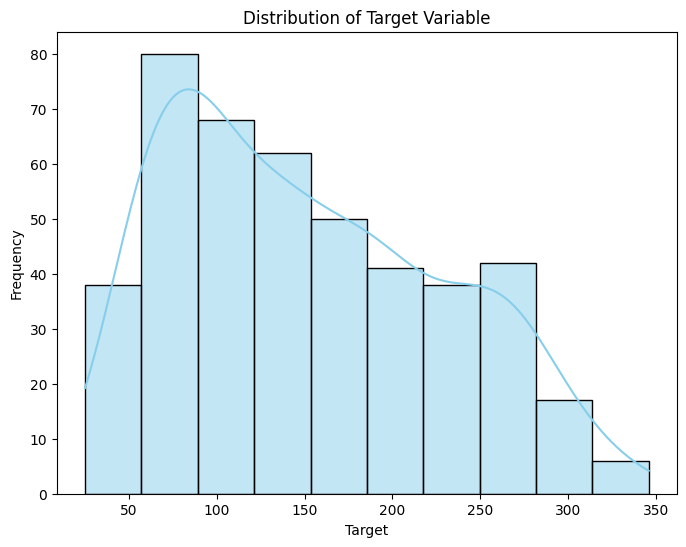

In [32]:
plt.figure(figsize=(8, 6))
sns.histplot(data['target'], kde=True, color='skyblue')
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

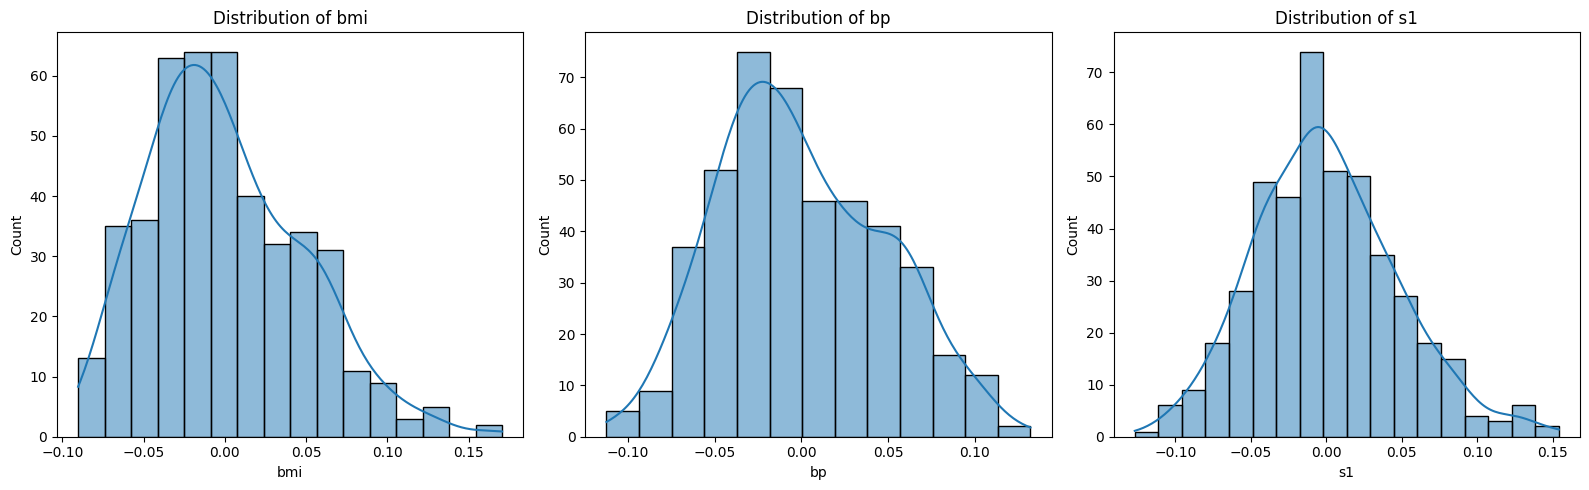

In [33]:
features = ['bmi', 'bp', 's1']
plt.figure(figsize=(16, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

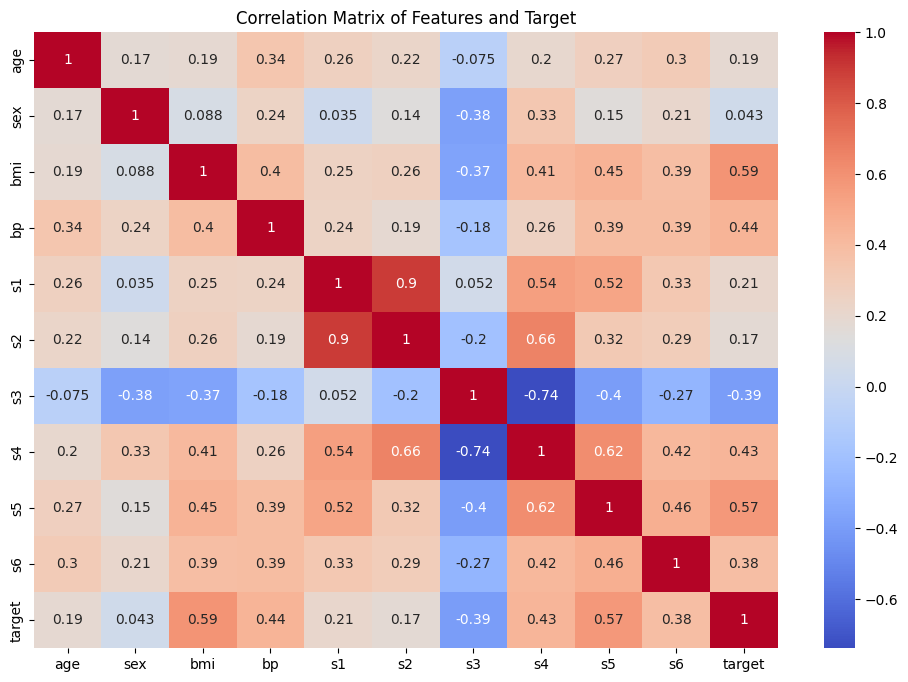

In [34]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features and Target')
plt.show()

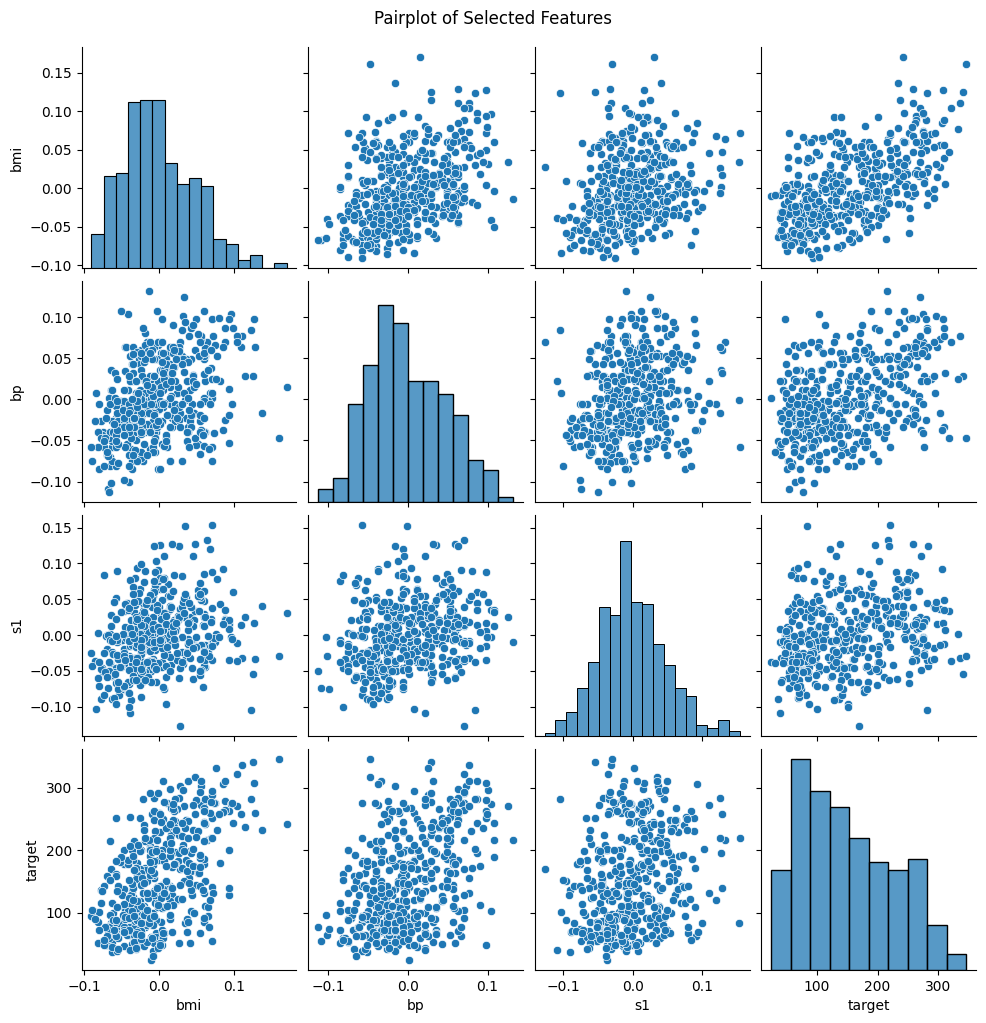

In [35]:
sns.pairplot(data[['bmi', 'bp', 's1', 'target']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [36]:
%pip install tensorflow-cpu


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import plot_model


In [38]:
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/home/compat/ProgrammingProjects/Algo/venv/lib64/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
%pip install pydot
%pip install graphviz


[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Model Layers:
[<Dense name=dense_9, built=True>, <Dense name=dense_10, built=True>, <Dense name=dense_11, built=True>]


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

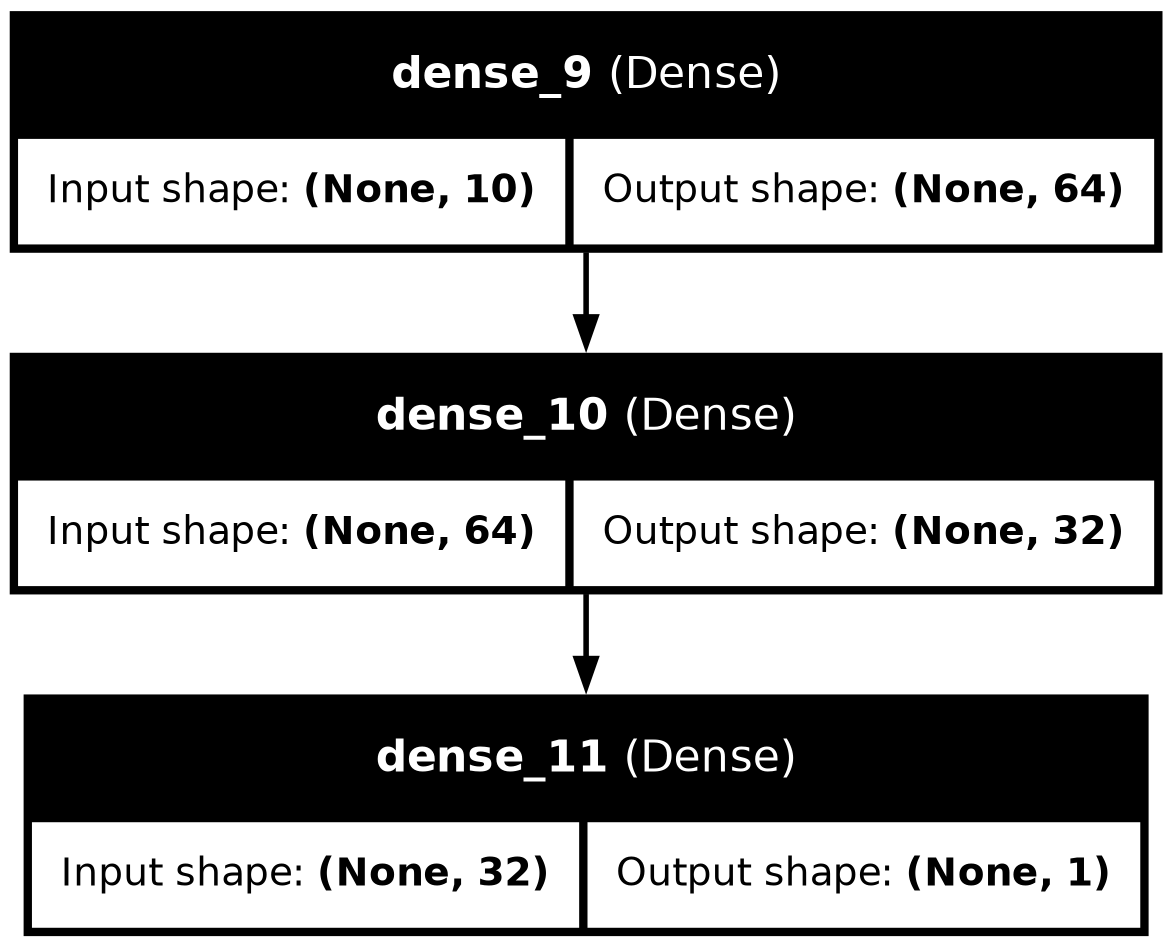

In [41]:
import pydot
print("Model Layers:")
print(model.layers)
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

In [42]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 32747.2246 - mae: 161.7015 - val_loss: 22460.2949 - val_mae: 134.0001
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 33337.1016 - mae: 165.1199 - val_loss: 22429.9375 - val_mae: 133.8890
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30209.1523 - mae: 155.1997 - val_loss: 22387.6152 - val_mae: 133.7337
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30787.1895 - mae: 157.1271 - val_loss: 22327.3770 - val_mae: 133.5134
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30880.4004 - mae: 157.6021 - val_loss: 22242.1367 - val_mae: 133.2031
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31437.6602 - mae: 158.0940 - val_loss: 22124.8301 - val_mae: 132.7767
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31771.2188 - mae: 159.0202 - val_loss: 21967.3652 - val_mae: 132.2029
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31212.3887 - mae: 157.9268 - val_loss: 21761.9727 - val_mae: 

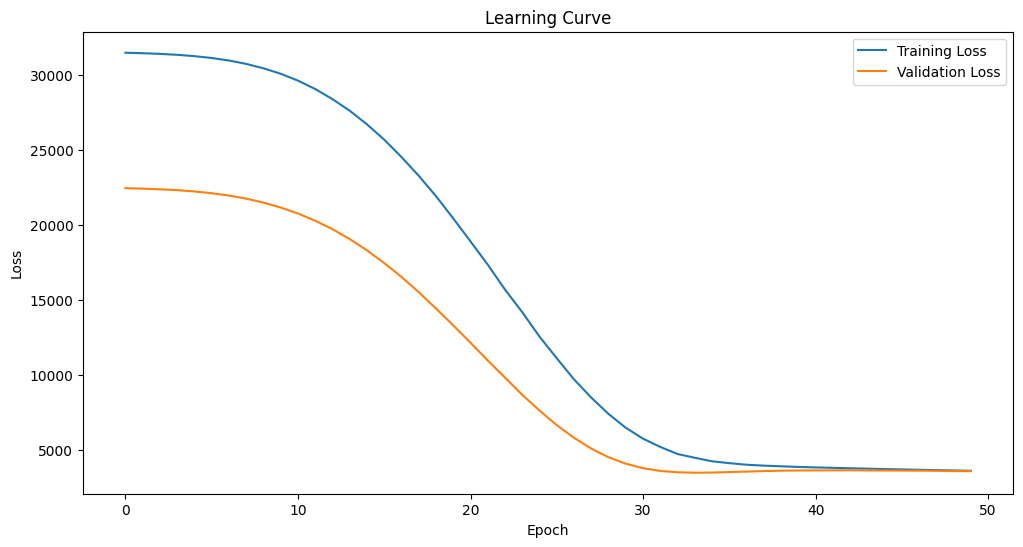

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [44]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3432.7222 - mae: 49.2626 
Test Loss: 3248.306884765625, Test MAE: 48.14585494995117


In [45]:
predictions = model.predict(X_test[:5])
print("Predictions on test set instances:", predictions)
print("Actual values:", y_test[:5].values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predictions on test set instances: [[171.14807]
 [168.12881]
 [164.3584 ]
 [262.77994]
 [156.31029]]
Actual values: [219.  70. 202. 230. 111.]


In [46]:
model_bn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(1)
])
model_bn.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_bn.summary()
history_bn = model_bn.fit(X_train, y_train, epochs=50, validation_split=0.2)

/home/compat/ProgrammingProjects/Algo/venv/lib64/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 31756.2344 - mae: 159.2395 - val_loss: 22473.4805 - val_mae: 134.0560
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31624.2266 - mae: 159.6048 - val_loss: 22456.6973 - val_mae: 134.0007
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32215.5020 - mae: 159.4750 - val_loss: 22441.6230 - val_mae: 133.9525
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28644.2129 - mae: 150.8903 - val_loss: 22425.6758 - val_mae: 133.9027
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29428.7773 - mae: 154.1376 - val_loss: 22410.6602 - val_mae: 133.8592
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29441.2480 - mae: 154.1174 - val_loss: 22402.9727 - val_mae: 133.8435
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30305.8164 - mae: 157.1635 - val_loss: 22394.3926 - val_mae: 133.8246
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32591.3164 - mae: 164.3751 - val_loss: 22392.3281 - val_mae: 

In [47]:
def msle_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(tf.math.log1p(y_true) - tf.math.log1p(y_pred)))


model_bn.compile(optimizer='adam', loss=msle_loss, metrics=['mae'])
history_bn_custom = model_bn.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_los

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


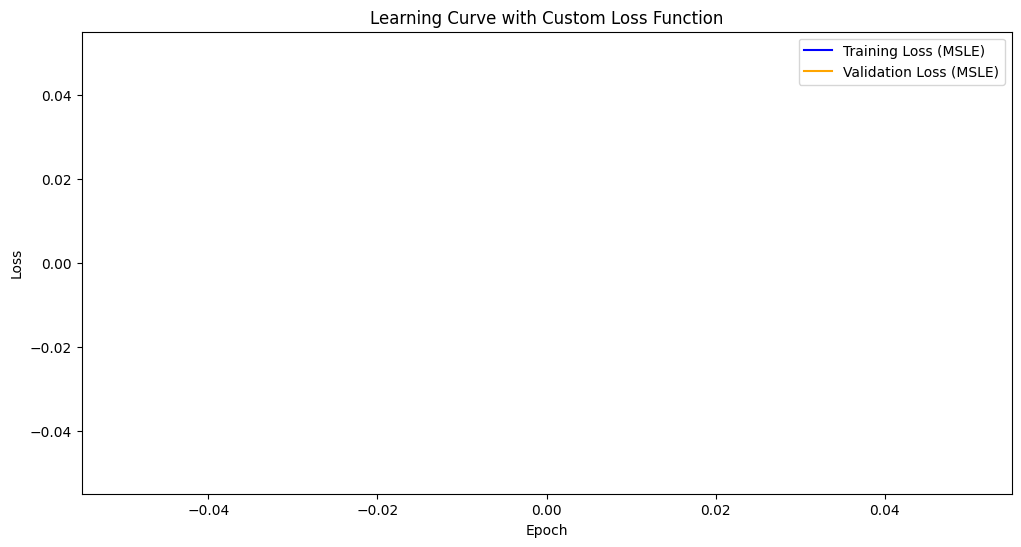

In [48]:
%matplotlib inline
print(history_bn_custom.history.keys())
plt.figure(figsize=(12, 6))

# Ensure that 'loss' and 'val_loss' exist in the history
if 'loss' in history_bn_custom.history and 'val_loss' in history_bn_custom.history:
    plt.plot(history_bn_custom.history['loss'], label='Training Loss (MSLE)', color='blue')
    plt.plot(history_bn_custom.history['val_loss'], label='Validation Loss (MSLE)', color='orange')
else:
    print("Loss data not found in the training history.")

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve with Custom Loss Function')
plt.legend()
plt.show()